In [229]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.distance import great_circle
from ip2geotools.databases.noncommercial import DbIpCity as ip2geo
from geopy.geocoders import Nominatim
from datasist.structdata import detect_outliers

In [248]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(rc={'figure.figsize': [8, 5]}, font_scale=1.2)

Task 5
-------------
1) Using visitor-interests.csv dataset, from the first 50 row extract latitude, longitude from 'IP' column and use it to create new 'Dist_From_Egypt' column calculating distance with Egypt Lat/Lonng, you can get this location from google.

In [2]:
visitor_df = pd.read_csv('datasets/visitor-interests.csv')

In [3]:
visitor_df

,IP,UserAgent,Country,Languages,Interests
0,1.10.195.126,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,TH,english,other
1,1.1.217.211,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,TH,thai,blog/personal homepage
2,1.115.198.107,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,JP,english,shop/online shopping website
3,1.121.152.143,Mozilla/5.0 (Linux; Android 7.0; Nexus 9 Build...,AU,english,company
4,1.123.135.213,Mozilla/5.0 (iPad; CPU OS 9_3_5 like Mac OS X)...,AU,english,company
...,...,...,...,...,...
19921,223.62.3.2,Mozilla/5.0 (Linux; Android 6.0.1; SM-N920S Bu...,KR,english,shop/online shopping website
19922,223.62.67.192,Mozilla/5.0 (Linux; Android 6.0.1; SM-N920S Bu...,KR,english,shop/online shopping website
19923,223.73.243.82,Mozilla/5.0 (Linux; U; Android 5.1.1; zh-cn; v...,CN,chinese,educational institution
19924,223.73.66.65,Mozilla/5.0 (Macintosh; Intel Mac OS X 10.11; ...,CN,english,magazine


In [14]:
def get_lat_long(place):
    try:
        geolocator = Nominatim(user_agent="Assignment")
        location = geolocator.geocode(place)
        return (location.raw['lat'], location.raw['lon'])
    except Exception as e:
        return(e)

In [28]:
egypt_lat_long = get_lat_long("Egypt")

def get_user_ip_data(ip):
    try:
        response = ip2geo.get(ip, api_key='free')
        distance = great_circle(egypt_lat_long, (response.latitude, response.longitude)).kilometers if response.latitude and response.longitude else np.nan
        return pd.Series((response.latitude, response.longitude, distance))
    except Exception as e:
        return(e)
    
visitor_df[['latitude', 'longitude', 'distance']] = visitor_df['IP'][0:51].apply(get_user_ip_data)

In [29]:
visitor_df[['latitude', 'longitude', 'distance']][:51].sample(10)

,latitude,longitude,distance
7,-30.784484,125.171489,11986.541244
24,-37.814218,144.963161,13937.050903
14,-33.869844,151.208285,14436.183336
16,-33.869844,151.208285,14436.183336
19,-33.869844,151.208285,14436.183336
40,25.119312,121.798774,9035.921890
38,24.806633,120.968683,8974.598419
49,19.008301,72.825146,4521.462630
6,-34.928181,138.599931,13319.054816
3,-33.869844,151.208285,14436.183336


--------------------------------------------------------------------------------------------------------------

On Credit_Card.csv dataset, do the following:
- 1- Read your dataset.
- 2- Make the appropriate cleansing for your columns based on logic and consistency.
- 3- Deal with the missing values with the both techniques (Once with pandas and once with scikit learn).
- 4- Find the columns that have outliers and find the indecies of those outliers and remove them.

In [379]:
credit_df = pd.read_csv('datasets/Credit_Card.csv')

In [380]:
credit_df

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [381]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Male            690 non-null    object 
 1   Age             690 non-null    object 
 2   Debt            690 non-null    float64
 3   Married         690 non-null    object 
 4   BankCustomer    690 non-null    object 
 5   EducationLevel  690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    object 
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [382]:
credit_df.describe()

,Debt,YearsEmployed,CreditScore,Income
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [383]:
credit_df.describe(exclude=[np.number])

,Male,Age,Married,BankCustomer,EducationLevel,Ethnicity,PriorDefault,Employed,DriversLicense,Citizen,ZipCode,Approved
count,690,690,690,690,690,690,690,690,690,690,690,690
unique,3,350,4,4,15,10,2,2,2,3,171,2
top,b,?,u,g,c,v,t,f,f,g,00000,-
freq,468,12,519,519,137,399,361,395,374,625,132,383


In [384]:
credit_df.isnull().sum()

Male              0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64

#### Cleaning Data
- Replace "?" values with Nan
- Change "Age" datatype to float
- Change (f, t) and (-, +) values to (0, 1) then change columns datatype to integer 

In [385]:
credit_df['Male'].value_counts()

b    468
a    210
?     12
Name: Male, dtype: int64

In [386]:
credit_df['Male'].replace('?', np.nan, inplace=True)
credit_df['Male'].value_counts()

b    468
a    210
Name: Male, dtype: int64

In [387]:
credit_df['Age'].value_counts()

?        12
22.67     9
20.42     7
25.00     6
22.50     6
         ..
62.75     1
33.50     1
47.33     1
54.83     1
21.42     1
Name: Age, Length: 350, dtype: int64

In [388]:
credit_df['Age'].replace('?', np.nan, inplace=True)
credit_df['Age'].value_counts()

22.67    9
20.42    7
18.83    6
24.50    6
22.50    6
        ..
62.75    1
33.50    1
54.83    1
26.83    1
21.42    1
Name: Age, Length: 349, dtype: int64

In [389]:
credit_df['Age'] = credit_df['Age'].astype('float')

In [390]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Male            678 non-null    object 
 1   Age             678 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    object 
 4   BankCustomer    690 non-null    object 
 5   EducationLevel  690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    object 
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    object 
dtypes: float64(3), int64(2), object(11)
memory usage: 86.4+ KB


In [391]:
credit_df['Married'].value_counts()

u    519
y    163
?      6
l      2
Name: Married, dtype: int64

In [392]:
credit_df['Married'].replace('?', np.nan, inplace=True)
credit_df['Married'].value_counts()

u    519
y    163
l      2
Name: Married, dtype: int64

In [393]:
credit_df['BankCustomer'].value_counts()

g     519
p     163
?       6
gg      2
Name: BankCustomer, dtype: int64

In [394]:
credit_df['BankCustomer'].replace('?', np.nan, inplace=True)
credit_df['BankCustomer'].value_counts()

g     519
p     163
gg      2
Name: BankCustomer, dtype: int64

In [395]:
credit_df['EducationLevel'].value_counts()

c     137
q      78
w      64
i      59
aa     54
ff     53
k      51
cc     41
m      38
x      38
d      30
e      25
j      10
?       9
r       3
Name: EducationLevel, dtype: int64

In [396]:
credit_df['EducationLevel'].replace('?', np.nan, inplace=True)
credit_df['EducationLevel'].value_counts()

c     137
q      78
w      64
i      59
aa     54
ff     53
k      51
cc     41
m      38
x      38
d      30
e      25
j      10
r       3
Name: EducationLevel, dtype: int64

In [397]:
credit_df['Ethnicity'].value_counts()

v     399
h     138
bb     59
ff     57
?       9
z       8
j       8
dd      6
n       4
o       2
Name: Ethnicity, dtype: int64

In [398]:
credit_df['Ethnicity'].replace('?', np.nan, inplace=True)
credit_df['Ethnicity'].value_counts()

v     399
h     138
bb     59
ff     57
z       8
j       8
dd      6
n       4
o       2
Name: Ethnicity, dtype: int64

In [399]:
credit_df['Citizen'].value_counts()

g    625
s     57
p      8
Name: Citizen, dtype: int64

In [400]:
credit_df['Employed'].value_counts()

f    395
t    295
Name: Employed, dtype: int64

In [401]:
credit_df['Employed'] = credit_df['Employed'].map({'f':0, 't':1}).astype('int')
credit_df['Employed'].value_counts()

0    395
1    295
Name: Employed, dtype: int64

In [402]:
credit_df['PriorDefault'].value_counts()

t    361
f    329
Name: PriorDefault, dtype: int64

In [403]:
credit_df['PriorDefault'] = credit_df['PriorDefault'].map({'f':0, 't':1}).astype('int')
credit_df['PriorDefault'].value_counts()

1    361
0    329
Name: PriorDefault, dtype: int64

In [404]:
credit_df['Approved'].value_counts()

-    383
+    307
Name: Approved, dtype: int64

In [405]:
credit_df['Approved'] = credit_df['Approved'].map({'-':0, '+':1}).astype('int')
credit_df['Approved'].value_counts()

0    383
1    307
Name: Approved, dtype: int64

In [406]:
credit_df['DriversLicense'].value_counts()

f    374
t    316
Name: DriversLicense, dtype: int64

In [407]:
credit_df['DriversLicense'] = credit_df['DriversLicense'].map({'f':0, 't':1}).astype('int')
credit_df['DriversLicense'].value_counts()

0    374
1    316
Name: DriversLicense, dtype: int64

In [408]:
credit_df.rename(columns={'DriversLicense':'HasDriverLicense'}, inplace = True)

In [409]:
credit_df['HasDriverLicense']

0      0
1      0
2      0
3      1
4      0
      ..
685    0
686    1
687    1
688    0
689    1
Name: HasDriverLicense, Length: 690, dtype: int64

In [410]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Male              678 non-null    object 
 1   Age               678 non-null    float64
 2   Debt              690 non-null    float64
 3   Married           684 non-null    object 
 4   BankCustomer      684 non-null    object 
 5   EducationLevel    681 non-null    object 
 6   Ethnicity         681 non-null    object 
 7   YearsEmployed     690 non-null    float64
 8   PriorDefault      690 non-null    int64  
 9   Employed          690 non-null    int64  
 10  CreditScore       690 non-null    int64  
 11  HasDriverLicense  690 non-null    int64  
 12  Citizen           690 non-null    object 
 13  ZipCode           690 non-null    object 
 14  Income            690 non-null    int64  
 15  Approved          690 non-null    int64  
dtypes: float64(3), int64(6), object(7)
memory us

----------------------------------------------------------------------------------------------------------------

#### Missing Values

In [411]:
credit_df.isnull().sum()

Male                12
Age                 12
Debt                 0
Married              6
BankCustomer         6
EducationLevel       9
Ethnicity            9
YearsEmployed        0
PriorDefault         0
Employed             0
CreditScore          0
HasDriverLicense     0
Citizen              0
ZipCode              0
Income               0
Approved             0
dtype: int64

In [412]:
for col in ['Male', 'Age', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity']:
    proportion = credit_df.isnull()[col].sum()/credit_df[col].count()
    print('Missing values in column {}: {:.5%}'.format(col, proportion))

Missing values in column Male: 1.76991%
Missing values in column Age: 1.76991%
Missing values in column Married: 0.87719%
Missing values in column BankCustomer: 0.87719%
Missing values in column EducationLevel: 1.32159%
Missing values in column Ethnicity: 1.32159%


In [413]:
credit_df[credit_df['Male'].isnull()]

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,HasDriverLicense,Citizen,ZipCode,Income,Approved
248,NaN,24.50,12.750,u,g,c,bb,4.750,1,1,2,0,g,00073,444,1
327,NaN,40.83,3.500,u,g,i,bb,0.500,0,0,0,0,s,01160,0,0
346,NaN,32.25,1.500,u,g,c,v,0.250,0,0,0,1,g,00372,122,0
374,NaN,28.17,0.585,u,g,aa,v,0.040,0,0,0,0,g,00260,1004,0
453,NaN,29.75,0.665,u,g,w,v,0.250,0,0,0,1,g,00300,0,0
479,NaN,26.50,2.710,y,p,NaN,NaN,0.085,0,0,0,0,s,00080,0,0
489,NaN,45.33,1.000,u,g,q,v,0.125,0,0,0,1,g,00263,0,0
520,NaN,20.42,7.500,u,g,k,v,1.500,1,1,1,0,g,00160,234,1
598,NaN,20.08,0.125,u,g,q,v,1.000,0,1,1,0,g,00240,768,1
601,NaN,42.25,1.750,y,p,NaN,NaN,0.000,0,0,0,1,g,00150,1,0


> Fill "Male", "Married", "EducationLevel", "Ethnicity", "BankCustomer", missing values with "Mode"

In [414]:
credit_df['Male'].fillna(credit_df['Male'].mode()[0], inplace=True)
credit_df['Married'].fillna(credit_df['Married'].mode()[0], inplace=True)

In [415]:
imputer = SimpleImputer(strategy='most_frequent')
credit_df['Ethnicity'] = imputer.fit_transform(credit_df[['Ethnicity']])
credit_df['EducationLevel'] = imputer.fit_transform(credit_df[['EducationLevel']])
credit_df['BankCustomer'] = imputer.fit_transform(credit_df[['BankCustomer']])

> Fill "Age" with "Mean"

In [416]:
imputer = SimpleImputer(strategy='mean')
credit_df['Age'] = imputer.fit_transform(credit_df[['Age']])

In [417]:
credit_df.isnull().sum()

Male                0
Age                 0
Debt                0
Married             0
BankCustomer        0
EducationLevel      0
Ethnicity           0
YearsEmployed       0
PriorDefault        0
Employed            0
CreditScore         0
HasDriverLicense    0
Citizen             0
ZipCode             0
Income              0
Approved            0
dtype: int64

----------------------------------------------------------------------------------------------------------------

#### Outliers

> Age

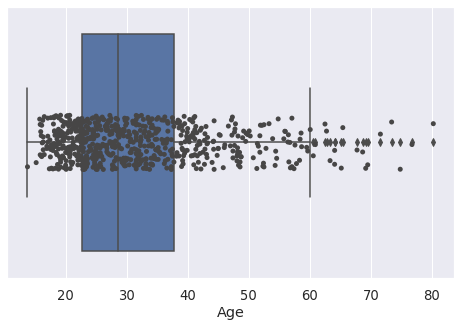

In [419]:
sns.boxplot(x='Age', data=credit_df)
sns.stripplot(x='Age', data=credit_df, color="#474646");

In [420]:
age_outliers = detect_outliers(credit_df, 0, ['Age'])
len(age_outliers)

18

In [421]:
credit_df.drop(age_outliers, inplace=True)

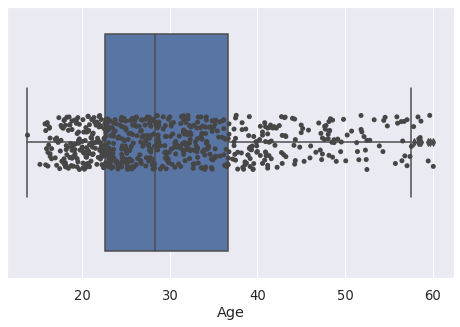

In [422]:
sns.boxplot(x='Age', data=credit_df)
sns.stripplot(x='Age', data=credit_df, color="#474646");

> Debt

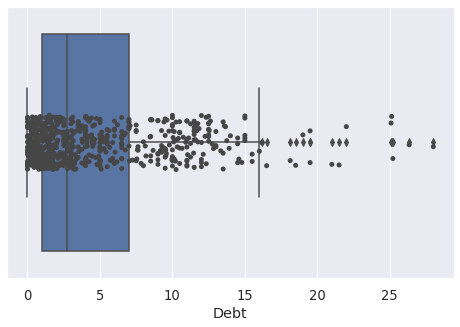

In [423]:
sns.boxplot(x='Debt', data=credit_df);
sns.stripplot(x='Debt', data=credit_df, color="#474646");

In [424]:
debt_outliers = detect_outliers(credit_df, 0, ['Debt'])
len(debt_outliers)

15

In [425]:
credit_df.drop(debt_outliers, inplace=True)

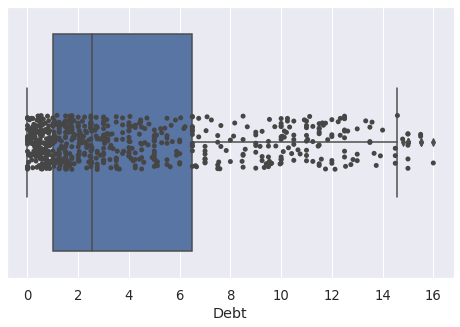

In [426]:
sns.boxplot(x='Debt', data=credit_df);
sns.stripplot(x='Debt', data=credit_df, color="#474646");

> YearsEmployed

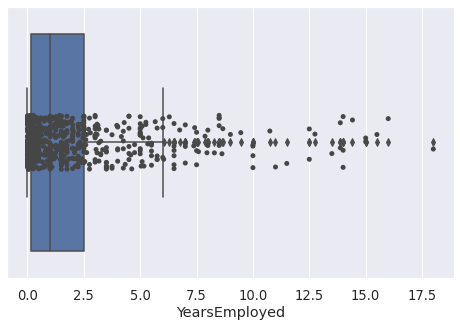

In [427]:
sns.boxplot(x='YearsEmployed', data=credit_df)
sns.stripplot(x='YearsEmployed', data=credit_df, color="#474646");

In [428]:
years_outliers = detect_outliers(credit_df, 0, ['YearsEmployed'])
len(years_outliers)

55

In [429]:
credit_df.loc[years_outliers, 'YearsEmployed'] = credit_df['YearsEmployed'].median()

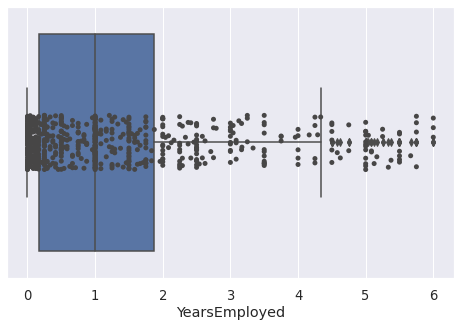

In [430]:
sns.boxplot(x='YearsEmployed', data=credit_df)
sns.stripplot(x='YearsEmployed', data=credit_df, color="#474646");

> CreditScore

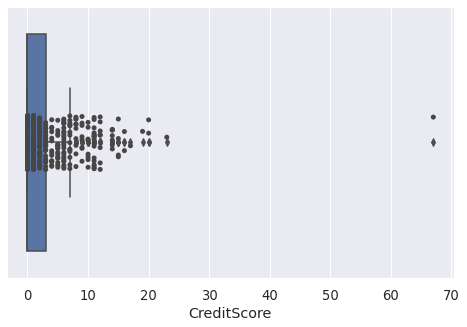

In [431]:
sns.boxplot(x='CreditScore', data=credit_df)
sns.stripplot(x='CreditScore', data=credit_df, color="#474646");

In [432]:
credit_outliers = detect_outliers(credit_df, 0, ['CreditScore'])
len(credit_outliers)

70

In [433]:
credit_df.loc[credit_outliers, 'CreditScore'] = credit_df['CreditScore'].median()

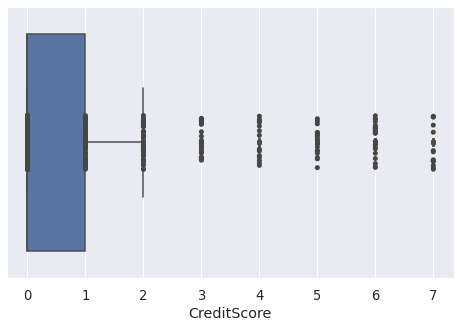

In [440]:
sns.boxplot(x='CreditScore', data=credit_df)
sns.stripplot(x='CreditScore', data=credit_df, color="#474646");

> Income

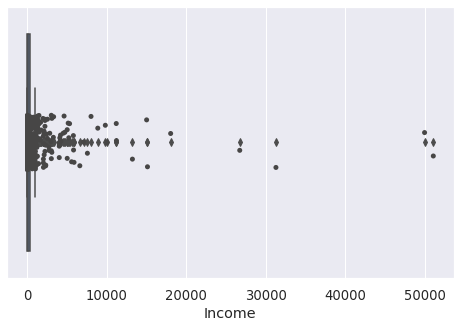

In [435]:
sns.boxplot(x='Income', data=credit_df);
sns.stripplot(x='Income', data=credit_df, color="#474646");

In [436]:
income_outliers = detect_outliers(credit_df, 0, ['Income'])
len(income_outliers)

105

In [437]:
credit_df.loc[income_outliers, 'Income'] = credit_df['Income'].median()

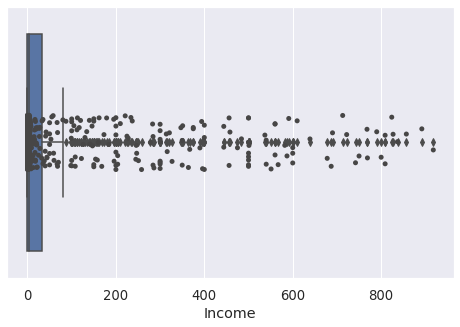

In [438]:
sns.boxplot(x='Income', data=credit_df);
sns.stripplot(x='Income', data=credit_df, color="#474646");